In [10]:
#pip install librosa
#!pip install tensorflow

In [58]:
import json
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import pandas as pd
import glob
import math
import scipy.signal as signal

In [2]:
import pandas as pd
data = pd.read_csv('가을문단json종합221104.csv', encoding='euc-kr')

In [3]:
data[:5]

,Unnamed: 0,category_id,file_name,sex,id,date_visited,age,group,category_name,category_id.1,PHQ-9,GAD-7,category_name.1,category_id.2,sleep_efficiency,category_name.2,category_id.3,ISI,spectral_centroid
0,0,8,..\..\..\원천데이터\음성\8 가을문단\000011_가을문단all.wav,1,11,2021-08-05,48,1,우울한 기분,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1416.26
1,1,8,..\..\..\원천데이터\음성\8 가을문단\000012_가을문단all.wav,1,12,2021-08-13,48,1,우울한 기분,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1802.15
2,2,8,..\..\..\원천데이터\음성\8 가을문단\000021_가을문단all.wav,1,21,2021-08-05,67,1,우울한 기분,1,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.73
3,3,8,..\..\..\원천데이터\음성\8 가을문단\000022_가을문단all.wav,1,22,2021-08-12,67,1,우울한 기분,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1868.85
4,4,8,..\..\..\원천데이터\음성\8 가을문단\000031_가을문단all.wav,2,31,2021-08-05,64,1,우울한 기분,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1355.44


In [4]:
# 샘플 데이터 확인
y , sr = librosa.load('./데이터 분류/1/000051_가을문단all.wav') # librosa.load() : 오디오 파일을 로드한다.

print(y)
print(len(y))
print('샘플 데이터의 속도(Hz): %d' %sr)
print('샘플 데이터의 길이(초): %.2f' % (len(y) / sr)) #데이터의 길이(초) = 음파의 길이/Sampling rate

[-1.2492104e-05 -2.0728294e-04 -2.8205590e-04 ...  4.0654969e-04
  2.1439258e-04  0.0000000e+00]
2475995
샘플 데이터의 속도(Hz): 22050
샘플 데이터의 길이(초): 112.29


In [5]:
y.shape

(2475995,)

In [6]:
path_dir = './가을문단분류_완본/1번' 
fileEx = r'.wav' # wav, json 파일이 섞여있어서 wav만 불러오기
file1 =[file for file in os.listdir(path_dir) if file.endswith(fileEx)]
file1

['000051_가을문단1.wav',
 '000051_가을문단2.wav',
 '000051_가을문단3.wav',
 '000051_가을문단4.wav',
 '000051_가을문단5.wav',
 '000051_가을문단6.wav',
 '000051_가을문단7.wav',
 '000051_가을문단8.wav',
 '000051_가을문단9.wav',
 '000052_가을문단1.wav',
 '000052_가을문단2.wav',
 '000052_가을문단3.wav',
 '000052_가을문단4.wav',
 '000052_가을문단5.wav',
 '000052_가을문단6.wav',
 '000052_가을문단7.wav',
 '000052_가을문단8.wav',
 '000052_가을문단9.wav',
 '000101_가을문단1.wav',
 '000101_가을문단2.wav',
 '000101_가을문단3.wav',
 '000101_가을문단4.wav',
 '000101_가을문단5.wav',
 '000101_가을문단6.wav',
 '000101_가을문단7.wav',
 '000101_가을문단8.wav',
 '000101_가을문단9.wav',
 '000112_가을문단1.wav',
 '000112_가을문단2.wav',
 '000112_가을문단3.wav',
 '000112_가을문단4.wav',
 '000112_가을문단5.wav',
 '000112_가을문단6.wav',
 '000112_가을문단7.wav',
 '000112_가을문단8.wav',
 '000112_가을문단9.wav',
 '000161_가을문단1.wav',
 '000161_가을문단2.wav',
 '000161_가을문단3.wav',
 '000161_가을문단4.wav',
 '000161_가을문단5.wav',
 '000161_가을문단6.wav',
 '000161_가을문단7.wav',
 '000161_가을문단8.wav',
 '000161_가을문단9.wav',
 '000201_가을문단1.wav',
 '000201_가을문단2.wav',
 '000201_가을문단

In [7]:
file1_2p = []

for i in range(len(file1)):
    if "2.wav" in file1[i]:
        file1_2p.append(file1[i])
        
file1_2p

['000051_가을문단2.wav',
 '000052_가을문단2.wav',
 '000101_가을문단2.wav',
 '000112_가을문단2.wav',
 '000161_가을문단2.wav',
 '000201_가을문단2.wav',
 '000202_가을문단2.wav',
 '000221_가을문단2.wav',
 '000222_가을문단2.wav',
 '000292_가을문단2.wav',
 '000341_가을문단2.wav',
 '000342_가을문단2.wav',
 '000361_가을문단2.wav',
 '000362_가을문단2.wav',
 '000381_가을문단2.wav',
 '000401_가을문단2.wav',
 '000402_가을문단2.wav',
 '000421_가을문단2.wav',
 '000422_가을문단2.wav',
 '000431_가을문단2.wav',
 '000432_가을문단2.wav',
 '000462_가을문단2.wav',
 '000472_가을문단2.wav',
 '000511_가을문단2.wav',
 '000512_가을문단2.wav',
 '000521_가을문단2.wav',
 '000522_가을문단2.wav',
 '000531_가을문단2.wav',
 '000551_가을문단2.wav',
 '000552_가을문단2.wav',
 '000561_가을문단2.wav',
 '000562_가을문단2.wav',
 '000571_가을문단2.wav',
 '000572_가을문단2.wav',
 '000581_가을문단2.wav',
 '000661_가을문단2.wav',
 '000662_가을문단2.wav',
 '000681_가을문단2.wav',
 '000682_가을문단2.wav',
 '000701_가을문단2.wav',
 '000702_가을문단2.wav',
 '000711_가을문단2.wav',
 '000712_가을문단2.wav',
 '000761_가을문단2.wav',
 '000762_가을문단2.wav',
 '000841_가을문단2.wav',
 '000861_가을문단2.wav',
 '000862_가을문단

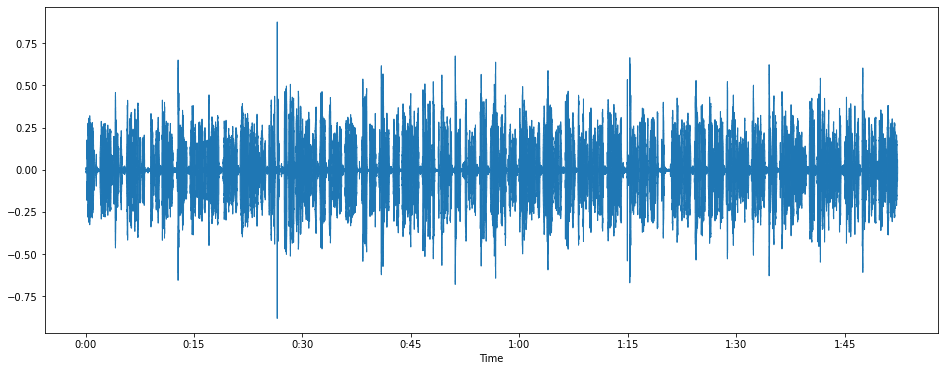

In [8]:
# 2D 음파 그래프로 확인
plt.figure(figsize =(16,6))
librosa.display.waveshow(y=y,sr=sr)
plt.show()

(1025, 4836)


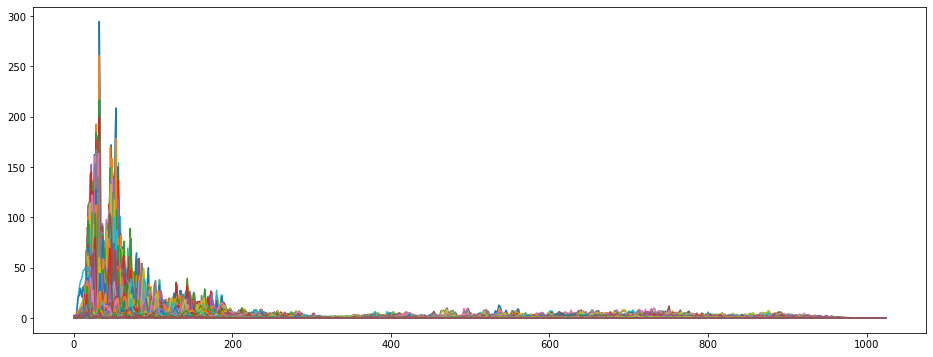

In [9]:
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 이 때, 음성의 길이를 얼마만큼으로 자를 것인가? 를 window라고 부른다.


print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

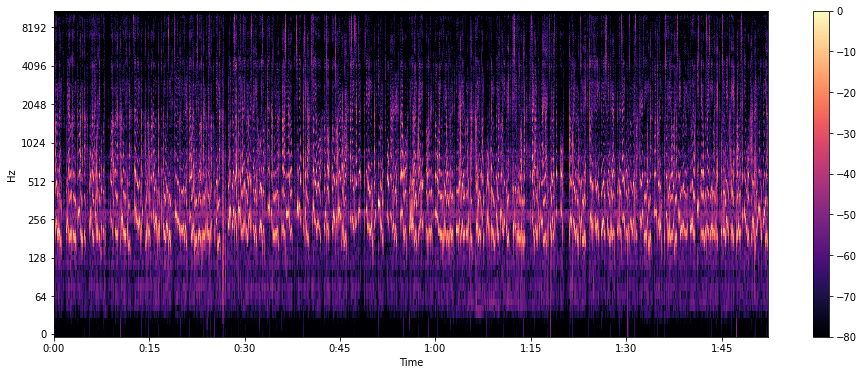

In [10]:
DB = librosa.amplitude_to_db(D, ref=np.max) #amplitude(진폭) -> DB(데시벨)로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [33]:
np.min(DB)

-80.0

In [22]:
librosa.mel_frequencies(n_mels=40)

array([    0.        ,    85.31725552,   170.63451104,   255.95176656,
         341.26902209,   426.58627761,   511.90353313,   597.22078865,
         682.53804417,   767.85529969,   853.17255522,   938.48981074,
        1024.85554588,  1119.11407321,  1222.04179301,  1334.43603258,
        1457.16745142,  1591.18678575,  1737.5322134 ,  1897.33739598,
        2071.84026081,  2262.39259049,  2470.47049443,  2697.68584352,
        2945.79875645,  3216.73123442,  3512.58204988,  3835.64300466,
        4188.41668329,  4573.63583931,  4994.2845644 ,  5453.62140461,
        5955.20460265,  6502.91966169,  7101.00944433,  7754.10703988,
        8467.27165444,  9246.02780196, 10096.40809975, 11025.        ])

In [13]:
import os
file_all = []

dir_path = "./가을문단분류_완본/"
for (root, directories, files) in os.walk(dir_path):
    for file in files:
        if '.wav' in file:
            file_path = os.path.join(root, file)
            file_all.append(file_path[15:])
file_all.sort()

In [15]:
file_all

['000011_가을문단1.wav',
 '000011_가을문단2.wav',
 '000011_가을문단3.wav',
 '000011_가을문단4.wav',
 '000011_가을문단5.wav',
 '000011_가을문단6.wav',
 '000011_가을문단7.wav',
 '000011_가을문단8.wav',
 '000011_가을문단9.wav',
 '000012_가을문단1.wav',
 '000012_가을문단2.wav',
 '000012_가을문단3.wav',
 '000012_가을문단4.wav',
 '000012_가을문단5.wav',
 '000012_가을문단6.wav',
 '000012_가을문단7.wav',
 '000012_가을문단8.wav',
 '000012_가을문단9.wav',
 '000021_가을문단1.wav',
 '000021_가을문단2.wav',
 '000021_가을문단3.wav',
 '000021_가을문단4.wav',
 '000021_가을문단5.wav',
 '000021_가을문단6.wav',
 '000021_가을문단7.wav',
 '000021_가을문단8.wav',
 '000021_가을문단9.wav',
 '000022_가을문단1.wav',
 '000022_가을문단2.wav',
 '000022_가을문단3.wav',
 '000022_가을문단4.wav',
 '000022_가을문단5.wav',
 '000022_가을문단6.wav',
 '000022_가을문단7.wav',
 '000022_가을문단8.wav',
 '000022_가을문단9.wav',
 '000031_가을문단1.wav',
 '000031_가을문단2.wav',
 '000031_가을문단3.wav',
 '000031_가을문단4.wav',
 '000031_가을문단5.wav',
 '000031_가을문단6.wav',
 '000031_가을문단7.wav',
 '000031_가을문단8.wav',
 '000031_가을문단9.wav',
 '000032_가을문단1.wav',
 '000032_가을문단2.wav',
 '000032_가을문단

In [16]:
len(file_all)

24813

In [76]:
y, sr = librosa.load("./가을문단분류_완본/1번/000051_가을문단1.wav", sr = None)

In [124]:
def pitch_range():
    
    max = 0
    min = 0
    
    S = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann))
    pitches, magnitudes = librosa.piptrack(S=S, sr=sr)

    shape = np.shape(pitches)
    nb_samples = shape[0]
    nb_windows = shape[1]

    for i in range(0, nb_windows):
        index = magnitudes[:,i].argmax()
        pitch = pitches[index,i]
        if(i==0):
            max = pitch
            min = pitch
        else:
            if(max<pitch):
                max = pitch
            if(min>pitch):
                min = pitch

    result = round(max - min, 3) # 소수점 세자리까지 출력
    return result

In [79]:
#normalize_function
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)

Text(0.5, 1.0, 'spectrogram')

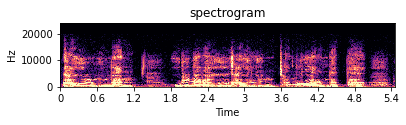

In [80]:
mag_db = librosa.amplitude_to_db(S)
mag_n = _normalize(mag_db)
plt.subplot(311)
librosa.display.specshow(mag_n, y_axis='linear', x_axis='time', sr=sampling_rate)
plt.title('spectrogram')

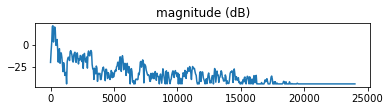

In [81]:
t = np.linspace(0, 24000, mag_db.shape[0])
plt.subplot(313)
plt.plot(t, mag_db[:, 100].T)
plt.title('magnitude (dB)')
plt.show()

In [99]:
import pandas as pd
df = pd.read_csv('가을문단json종합221108.csv', encoding='euc-kr')
df

,Unnamed: 0,category_id,file_name,sex,id,date_visited,age,group,category_name,category_id.1,...,spectral_centroid,pitch_range_1,pitch_range_2,pitch_range_3,pitch_range_4,pitch_range_5,pitch_range_6,pitch_range_7,pitch_range_8,pitch_range_9
0,0,8,..\..\..\원천데이터\음성\8 가을문단\000011_가을문단all.wav,1,11,2021-08-05,48,1,우울한 기분,1,...,1416.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8,..\..\..\원천데이터\음성\8 가을문단\000012_가을문단all.wav,1,12,2021-08-13,48,1,우울한 기분,1,...,1802.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8,..\..\..\원천데이터\음성\8 가을문단\000021_가을문단all.wav,1,21,2021-08-05,67,1,우울한 기분,1,...,1985.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8,..\..\..\원천데이터\음성\8 가을문단\000022_가을문단all.wav,1,22,2021-08-12,67,1,우울한 기분,1,...,1868.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,8,..\..\..\원천데이터\음성\8 가을문단\000031_가을문단all.wav,2,31,2021-08-05,64,1,우울한 기분,1,...,1355.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2755,8,..\..\..\원천데이터\음성\8 가을문단\300462_가을문단all.wav,2,300462,2021-12-28,22,2,정상,0,...,1701.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752,2756,8,..\..\..\원천데이터\음성\8 가을문단\300471_가을문단all.wav,1,300471,2021-12-22,31,2,우울한 기분,1,...,1495.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2753,2757,8,..\..\..\원천데이터\음성\8 가을문단\300472_가을문단all.wav,1,300472,2021-12-29,31,2,우울한 기분,1,...,1481.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2754,2758,8,..\..\..\원천데이터\음성\8 가을문단\300481_가을문단all.wav,2,300481,2021-12-22,22,2,정상,0,...,1735.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
len(df)

2756

In [101]:
df.loc[0, ('pitch_range_1')]

nan

In [86]:
path_dir = 'D:\가을문단분류_완본/' 
fileEx = r'.wav' # wav, json 파일이 섞여있어서 wav만 불러오기
file_split_all =[file for file in os.listdir(path_dir) if file.endswith(fileEx)]
file_split_all

['000011_가을문단1.wav',
 '000011_가을문단2.wav',
 '000011_가을문단3.wav',
 '000011_가을문단4.wav',
 '000011_가을문단5.wav',
 '000011_가을문단6.wav',
 '000011_가을문단7.wav',
 '000011_가을문단8.wav',
 '000011_가을문단9.wav',
 '000012_가을문단1.wav',
 '000012_가을문단2.wav',
 '000012_가을문단3.wav',
 '000012_가을문단4.wav',
 '000012_가을문단5.wav',
 '000012_가을문단6.wav',
 '000012_가을문단7.wav',
 '000012_가을문단8.wav',
 '000012_가을문단9.wav',
 '000021_가을문단1.wav',
 '000021_가을문단2.wav',
 '000021_가을문단3.wav',
 '000021_가을문단4.wav',
 '000021_가을문단5.wav',
 '000021_가을문단6.wav',
 '000021_가을문단7.wav',
 '000021_가을문단8.wav',
 '000021_가을문단9.wav',
 '000022_가을문단1.wav',
 '000022_가을문단2.wav',
 '000022_가을문단3.wav',
 '000022_가을문단4.wav',
 '000022_가을문단5.wav',
 '000022_가을문단6.wav',
 '000022_가을문단7.wav',
 '000022_가을문단8.wav',
 '000022_가을문단9.wav',
 '000031_가을문단1.wav',
 '000031_가을문단2.wav',
 '000031_가을문단3.wav',
 '000031_가을문단4.wav',
 '000031_가을문단5.wav',
 '000031_가을문단6.wav',
 '000031_가을문단7.wav',
 '000031_가을문단8.wav',
 '000031_가을문단9.wav',
 '000032_가을문단1.wav',
 '000032_가을문단2.wav',
 '000032_가을문단

In [87]:
len(file_split_all)

24804

In [93]:
for num in range(1, 10):
    globals()["file_split_{}".format(num)] = []
    num = str(num)

    for i in range(len(file_split_all)):
         if num+".wav" in file_split_all[i]:   # num(1~9)+.wav 파일을 
            globals()["file_split_{}".format(num)].append(file_split_all[i]) # 해당 리스트에 append 해라
        
file_split_9

['000011_가을문단9.wav',
 '000012_가을문단9.wav',
 '000021_가을문단9.wav',
 '000022_가을문단9.wav',
 '000031_가을문단9.wav',
 '000032_가을문단9.wav',
 '000041_가을문단9.wav',
 '000042_가을문단9.wav',
 '000051_가을문단9.wav',
 '000052_가을문단9.wav',
 '000061_가을문단9.wav',
 '000062_가을문단9.wav',
 '000071_가을문단9.wav',
 '000072_가을문단9.wav',
 '000081_가을문단9.wav',
 '000082_가을문단9.wav',
 '000091_가을문단9.wav',
 '000092_가을문단9.wav',
 '000101_가을문단9.wav',
 '000102_가을문단9.wav',
 '000111_가을문단9.wav',
 '000112_가을문단9.wav',
 '000131_가을문단9.wav',
 '000132_가을문단9.wav',
 '000141_가을문단9.wav',
 '000142_가을문단9.wav',
 '000151_가을문단9.wav',
 '000152_가을문단9.wav',
 '000161_가을문단9.wav',
 '000162_가을문단9.wav',
 '000171_가을문단9.wav',
 '000172_가을문단9.wav',
 '000181_가을문단9.wav',
 '000182_가을문단9.wav',
 '000192_가을문단9.wav',
 '000201_가을문단9.wav',
 '000202_가을문단9.wav',
 '000221_가을문단9.wav',
 '000222_가을문단9.wav',
 '000231_가을문단9.wav',
 '000232_가을문단9.wav',
 '000241_가을문단9.wav',
 '000242_가을문단9.wav',
 '000261_가을문단9.wav',
 '000262_가을문단9.wav',
 '000271_가을문단9.wav',
 '000272_가을문단9.wav',
 '000281_가을문단

In [98]:
for i in range(1, 10):
    print(len(globals()["file_split_{}".format(i)]))

2756
2756
2756
2756
2756
2756
2756
2756
2756


In [159]:
path_dir = 'D:\가을문단분류_완본/'
for num1 in range(1, 10):
    num1 = str(num1)
    for num2 in range(2756):
        y , sr = librosa.load(path_dir+globals()["file_split_{}".format(num1)][num2], sr=None)
        max = 0
        min = 0    
        S = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann))
        pitches, magnitudes = librosa.piptrack(S=S, sr=sr)

        shape = np.shape(pitches)
        nb_samples = shape[0]
        nb_windows = shape[1]

        for i in range(0, nb_windows):
            index = magnitudes[:,i].argmax()
            pitch = pitches[index,i]
            if(i==0):
                max = pitch
                min = pitch
            else:
                if(max<pitch):
                    max = pitch
                if(min>pitch):
                    min = pitch

        result = round(max - min) 
        df.loc[num2, ('pitch_range_'+num1)] = result
    
    num1 = int(num1)
    print("%d번째 파일 끝" %num1)

1번째 파일 끝
2번째 파일 끝
3번째 파일 끝
4번째 파일 끝
5번째 파일 끝
6번째 파일 끝
7번째 파일 끝
8번째 파일 끝
9번째 파일 끝


In [160]:
df.loc[0, ('pitch_range_1')]

3953.0

In [161]:
df

,Unnamed: 0,category_id,file_name,sex,id,date_visited,age,group,category_name,category_id.1,...,spectral_centroid,pitch_range_1,pitch_range_2,pitch_range_3,pitch_range_4,pitch_range_5,pitch_range_6,pitch_range_7,pitch_range_8,pitch_range_9
0,0,8,..\..\..\원천데이터\음성\8 가을문단\000011_가을문단all.wav,1,11,2021-08-05,48,1,우울한 기분,1,...,1416.26,3953.0,4001.0,3949.0,3976.0,4003.0,3983.0,3969.0,4003.0,3989.0
1,1,8,..\..\..\원천데이터\음성\8 가을문단\000012_가을문단all.wav,1,12,2021-08-13,48,1,우울한 기분,1,...,1802.15,3994.0,3940.0,3908.0,3773.0,3714.0,3967.0,3947.0,3992.0,3992.0
2,2,8,..\..\..\원천데이터\음성\8 가을문단\000021_가을문단all.wav,1,21,2021-08-05,67,1,우울한 기분,1,...,1985.73,3864.0,2867.0,3997.0,3977.0,3866.0,3901.0,3997.0,4002.0,4006.0
3,3,8,..\..\..\원천데이터\음성\8 가을문단\000022_가을문단all.wav,1,22,2021-08-12,67,1,우울한 기분,1,...,1868.85,3975.0,3776.0,3998.0,3772.0,3996.0,3976.0,3993.0,3941.0,3991.0
4,4,8,..\..\..\원천데이터\음성\8 가을문단\000031_가을문단all.wav,2,31,2021-08-05,64,1,우울한 기분,1,...,1355.44,3895.0,3922.0,3974.0,3944.0,4005.0,3986.0,3828.0,4000.0,4003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2755,8,..\..\..\원천데이터\음성\8 가을문단\300462_가을문단all.wav,2,300462,2021-12-28,22,2,정상,0,...,1701.40,1756.0,2897.0,3996.0,3953.0,3832.0,3991.0,3982.0,3830.0,3993.0
2752,2756,8,..\..\..\원천데이터\음성\8 가을문단\300471_가을문단all.wav,1,300471,2021-12-22,31,2,우울한 기분,1,...,1495.53,3840.0,3938.0,3973.0,3955.0,4003.0,3996.0,3987.0,4001.0,3977.0
2753,2757,8,..\..\..\원천데이터\음성\8 가을문단\300472_가을문단all.wav,1,300472,2021-12-29,31,2,우울한 기분,1,...,1481.26,3704.0,1662.0,3933.0,3998.0,3886.0,3840.0,3933.0,3960.0,3973.0
2754,2758,8,..\..\..\원천데이터\음성\8 가을문단\300481_가을문단all.wav,2,300481,2021-12-22,22,2,정상,0,...,1735.88,3758.0,3531.0,4002.0,3766.0,3794.0,3580.0,3928.0,3990.0,4003.0


In [162]:
df.to_csv("가을문단json종합221108.csv", mode='w', encoding='euc-kr')

In [157]:
# df = df.drop('globals()["pitch_range_{}".format(num1)]', axis=1)

In [34]:
#path = './가을문단_데이터_전달용_원본/가을문단_음성/' 
#for i in range(len(file_O_all)):
#    y , sr = librosa.load(path+file_O_all[i])
#    s_c = librosa.feature.spectral_centroid(y=y, sr=sr)
#    df.loc[i, ('spectral_centroid')] = round(np.mean(s_c), 2)
#    if(i%100==0):
#        print("%d 번째 진행중" %i)

In [35]:
# df.loc[2014, ('spectral_centroid')] #2015부터 error

nan

In [37]:
# 샘플 데이터 확인
#y , sr = librosa.load('./데이터 분류/1/207622_가을문단all.wav') # 207622 파일 크기가 너무 작아서 인식이 되지 않음.

#print(y)
#print(len(y))
#print('샘플 데이터의 속도(Hz): %d' %sr)
#print('샘플 데이터의 길이(초): %.2f' % (len(y) / sr)) #데이터의 길이(초) = 음파의 길이/Sampling rate

C:\Users\HOME\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: './데이터 분류/1/207622_가을문단all.wav'

In [ ]:
#path = './가을문단_데이터_전달용_원본/가을문단_음성/' 
#for i in range(2015, 2760):
#    if(i!=2015):
#        y , sr = librosa.load(path+file_O_all[i])
#        s_c = librosa.feature.spectral_centroid(y=y, sr=sr)
#        df.loc[i, ('spectral_centroid')] = round(np.mean(s_c), 2)
#        if(i%100==0):
#            print("%d 번째 진행중" %i)
#    if(i==2015):
#        df.loc[i, ('spectral_centroid')] = 1